In [ ]:
cd /content/drive/MyDrive/yolov5/runs/detect/exp57/labels

/content/drive/MyDrive/yolov5/runs/detect/exp57/labels


In [ ]:
import os
import glob
import pandas as pd
width=416
height=416
image_id=0
row1=[]
bbox_temp1=[]
final_df1=[]
os.chdir(r'//content/drive/MyDrive/yolov5/runs/detect/exp57/labels')
myFiles = glob.glob('*.txt')
for items in myFiles:
  with open(items, 'rt') as fd:
      lines1 = fd.readlines()
      for i in range(len(lines1)):
        splited1 = lines1[i].split()
        #print(splited1)
        if (float(splited1[5])<=0.15):
          print(1) #Nothing
        else:
          row1.append(items)
          row1.append(image_id)
          row1.append(width)
          row1.append(height)
          cen_x=(float(splited1[1])*width)
          cen_y=(float(splited1[2])*height)
          w=(float(splited1[3])*width)
          h=(float(splited1[4])*height)
          x=float(cen_x - w/2)
          y=float(cen_y - h/2)
          x_min=round(x)
          y_min=round(y)
          x_max=round(x+w)
          y_max=round(y+h)
          row1.append(x_min)
          row1.append(y_min)
          row1.append(x_max)
          row1.append(y_max)
          print(row1)
          final_df1.append(row1)
          df = pd.DataFrame(final_df1,columns=['filename','class', 'width', 'height','xmin','ymin','xmax','ymax'])
          row1=[]
          finals_df1=[]
df.to_csv("Predicted_0.65_org.csv",index=False)


['guas_005_1.5.txt', 0, 416, 416, 209, 157, 286, 218]
['guas_005_1.5.txt', 0, 416, 416, 231, 57, 305, 116]
['guas_005_1.5.txt', 0, 416, 416, 235, 316, 300, 373]
['guas_005_1.5.txt', 0, 416, 416, 208, 270, 281, 338]
['guas_005_1.5.txt', 0, 416, 416, 207, 212, 280, 278]
['guas_005_1.5.txt', 0, 416, 416, 221, 105, 295, 164]
['guas_005_1.txt', 0, 416, 416, 212, 159, 285, 217]
['guas_005_1.txt', 0, 416, 416, 235, 316, 300, 372]
['guas_005_1.txt', 0, 416, 416, 221, 105, 295, 164]
['guas_005_1.txt', 0, 416, 416, 211, 272, 280, 335]
['guas_005_1.txt', 0, 416, 416, 207, 213, 278, 277]
['guas_005_1.txt', 0, 416, 416, 231, 57, 305, 116]
['salt&pepper_005_0.02.txt', 0, 416, 416, 213, 160, 287, 217]
['salt&pepper_005_0.02.txt', 0, 416, 416, 233, 312, 302, 369]
['salt&pepper_005_0.02.txt', 0, 416, 416, 209, 270, 278, 331]
['salt&pepper_005_0.02.txt', 0, 416, 416, 221, 105, 295, 164]
['salt&pepper_005_0.02.txt', 0, 416, 416, 233, 56, 304, 113]
['salt&pepper_005_0.02.txt', 0, 416, 416, 207, 213, 280, 

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
path = '/content/drive/MyDrive/005_S8'
# Store the image file names in a list as long as they are jpgs
images = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.png']

In [ ]:
images=sorted(images)
images

['guas_005_1.5.png',
 'guas_005_1.png',
 'salt&pepper_005_0.02.png',
 'salt&pepper_005_0.035.png',
 'salt&pepper_005_0.05.png']

In [ ]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
from math import sqrt
from google.colab.patches import cv2_imshow
# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

In [ ]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
import csv
file = open('/content/drive/MyDrive/yolov5/runs/detect/exp57/labels/Predicted_0.65_org.csv')
lns = csv.reader(file)

In [ ]:
names12=[]
names1=[]
xmn_o=[]
ymn_o=[]
xmx_o=[]
ymx_o=[]
for line in lns:
       nam1=line[0]
       xmin= line[4]
       ymin= line[5]
       xmax= line[6]
       ymax= line[7]
      # print(nam1)
       names1.append(nam1)
       for j in range(len(images)):
        image = cv2.imread(images[j])
        if nam1 in images[j]:
          print(nam1, xmin,ymin,xmax,ymax)
          xmn_o.append(xmin)
          ymn_o.append(ymin)
          xmx_o.append(xmax)
          ymx_o.append(ymax)
          
   


guas_005_1.5.png 209 157 286 218
guas_005_1.5.png 231 57 305 116
guas_005_1.5.png 235 316 300 373
guas_005_1.5.png 208 270 281 338
guas_005_1.5.png 207 212 280 278
guas_005_1.5.png 221 105 295 164
guas_005_1.png 212 159 285 217
guas_005_1.png 235 316 300 372
guas_005_1.png 221 105 295 164
guas_005_1.png 211 272 280 335
guas_005_1.png 207 213 278 277
guas_005_1.png 231 57 305 116
salt&pepper_005_0.02.png 213 160 287 217
salt&pepper_005_0.02.png 233 312 302 369
salt&pepper_005_0.02.png 209 270 278 331
salt&pepper_005_0.02.png 221 105 295 164
salt&pepper_005_0.02.png 233 56 304 113
salt&pepper_005_0.02.png 207 213 280 274
salt&pepper_005_0.035.png 233 55 305 114
salt&pepper_005_0.035.png 213 155 287 217
salt&pepper_005_0.035.png 222 101 298 164
salt&pepper_005_0.035.png 233 312 303 369
salt&pepper_005_0.035.png 207 268 281 333
salt&pepper_005_0.035.png 205 209 282 277
salt&pepper_005_0.05.png 208 155 287 221
salt&pepper_005_0.05.png 231 55 307 117
salt&pepper_005_0.05.png 220 101 296 166


In [ ]:
ymx_o

In [ ]:
file1 = open('/content/drive/MyDrive/yolov5/runs/detect/exp57/labels/Predicted_0.65_org.csv')
lns1 = csv.reader(file1)

In [ ]:
names12=[]
names1=[]
xmn_p=[]
ymn_p=[]
xmx_p=[]
ymx_p=[]

for line1 in lns1:
       nam1=line1[0]
       xmin= line1[4]
       ymin= line1[5]
       xmax= line1[6]
       ymax= line1[7]
      # print(nam1)
       names12.append(nam1)
       for j in range(len(images)):
        image = cv2.imread(images[j])
        if nam1 in images[j]:
          print(nam1, xmin,ymin,xmax,ymax)
          xmn_p.append(xmin)
          ymn_p.append(ymin)
          xmx_p.append(xmax)
          ymx_p.append(ymax)
          
   


guas_005_1.5.png 209 157 286 218
guas_005_1.5.png 231 57 305 116
guas_005_1.5.png 235 316 300 373
guas_005_1.5.png 208 270 281 338
guas_005_1.5.png 207 212 280 278
guas_005_1.5.png 221 105 295 164
guas_005_1.png 212 159 285 217
guas_005_1.png 235 316 300 372
guas_005_1.png 221 105 295 164
guas_005_1.png 211 272 280 335
guas_005_1.png 207 213 278 277
guas_005_1.png 231 57 305 116
salt&pepper_005_0.02.png 213 160 287 217
salt&pepper_005_0.02.png 233 312 302 369
salt&pepper_005_0.02.png 209 270 278 331
salt&pepper_005_0.02.png 221 105 295 164
salt&pepper_005_0.02.png 233 56 304 113
salt&pepper_005_0.02.png 207 213 280 274
salt&pepper_005_0.035.png 233 55 305 114
salt&pepper_005_0.035.png 213 155 287 217
salt&pepper_005_0.035.png 222 101 298 164
salt&pepper_005_0.035.png 233 312 303 369
salt&pepper_005_0.035.png 207 268 281 333
salt&pepper_005_0.035.png 205 209 282 277
salt&pepper_005_0.05.png 208 155 287 221
salt&pepper_005_0.05.png 231 55 307 117
salt&pepper_005_0.05.png 220 101 296 166


In [ ]:
xmn_o

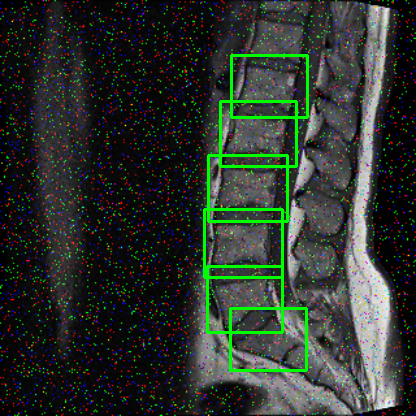

True

In [ ]:
import cv2
j=4
plus=24
x_coordinates=[]
x_coordinates_o=[]
y_coordinates=[]
y_coordinates_o=[]
Eu_dist=[]
image=cv2.imread(images[j])
width = 416
height = 416
dim = (width, height)
resized=cv2.resize(image,dim)
#cv2_imshow(image)
for i in range(6):
  examples = [Detection(images[j], [int(xmn_o[i+plus]), int(ymn_o[i+plus]), int(xmx_o[i+plus]), int(ymx_o[i+plus])], [int(xmn_p[i+plus]),int(ymn_p[i+plus]),int(xmx_p[i+plus]),int(ymx_p[i+plus])] ) ]

  for detection in examples:
         cv2.rectangle(resized, tuple((detection.gt[:2])),tuple((detection.gt[2:])), (0, 255, 0), 2)
         #cv2.rectangle(image, tuple(detection.pred[:2]),tuple(detection.pred[2:]), (0, 0, 255), 2)
         #cv2_imshow(image)

cv2_imshow(resized)
#cv2.waitKey(0)
cv2.imwrite('color.jpg',resized)
#cv2.destroyAllWindows()


In [ ]:
cd /content/drive/MyDrive/005_S8

/content/drive/MyDrive/005_S8


In [ ]:
images[j]

'guas_001_1.5.png'

In [ ]:
import cv2
j=0
x_coordinates=[]
x_coordinates_o=[]
y_coordinates=[]
y_coordinates_o=[]
Eu_dist=[]
image=cv2.imread(images[j])
cv2_imshow(image)

AttributeError: ignored

In [ ]:
from google.colab.patches import cv2_imshow